<a href="https://colab.research.google.com/github/Zak-Rey/CNN/blob/main/CustomerIssueTickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras
from keras import layers

num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(
    shape = (None,), name="title"
)
body_input = keras.Input(shape = (None,), name="body")
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)

title_features = layers.Embedding(num_words, 64)(title_input)

body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)

body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name="priority")(x)

department_pred = layers.Dense(num_departments, name="department")(x)

model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

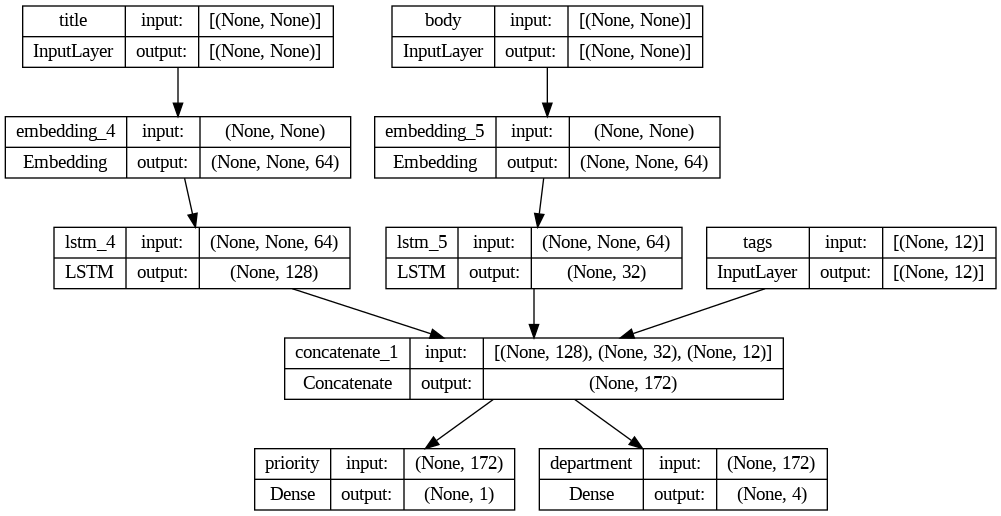

In [5]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)